# Analyse clinical steady state warfarin data

In [80]:
import os

import matplotlib.patches as  mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Import data

In [31]:
directory = os.getcwd()
data_raw = pd.read_csv(
    directory + '/clinical_steady_state_INR_data_extracted_data.csv',
    header=0, usecols=list(range(67)), nrows=5700)
data_raw

,PharmGKB Subject ID,PharmGKB Sample ID,Project Site,Gender,Race (Reported),Race (OMB),Ethnicity (Reported),Ethnicity (OMB),Age,Height (cm),...,VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,VKORC1 QC genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,CYP2C9 consensus,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus
0,PA135312261,PA135312629,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,193.04,...,NaN,NaN,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN
1,PA135312262,PA135312630,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,176.53,...,NaN,C/C,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C
2,PA135312263,PA135312631,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,40 - 49,162.56,...,NaN,NaN,*1/*1,G/G,T/T,NaN,G/G,A/G,NaN,NaN
3,PA135312264,PA135312632,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,182.24,...,NaN,NaN,*1/*1,A/G,G/T,NaN,C/G,G/G,NaN,NaN
4,PA135312265,PA135312633,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,167.64,...,NaN,NaN,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,PA152407681,PA152407969,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,20 - 29,185.42,...,NaN,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5696,PA152407682,PA152407970,21,female,White,White,not Hispanic or Latino,not Hispanic or Latino,70 - 79,160.02,...,NaN,NaN,*1/*3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5697,PA152407683,PA152407971,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,187.96,...,NaN,NaN,*1/*1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5698,PA152407684,PA152407972,21,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,177.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For this study we are not interested in drug-drug interactions, so let's
reduce the dataset to the relevant columns.

In [154]:
data = data_raw[[
    'PharmGKB Subject ID', 'PharmGKB Sample ID', 'Gender', 'Race (OMB)',
    'Ethnicity (OMB)', 'Age', 'Height (cm)', 'Weight (kg)', 'Target INR',
    'Subject Reached Stable Dose of Warfarin', 'Therapeutic Dose of Warfarin',
    'INR on Reported Therapeutic Dose of Warfarin', 'CYP2C9 consensus',
    'VKORC1 -1639 consensus', 'VKORC1 497 consensus', 'VKORC1 1173 consensus',
    'VKORC1 1542 consensus', 'VKORC1 3730 consensus', 'VKORC1 2255 consensus',
    'VKORC1 -4451 consensus']]

# Filter rows were dose of warfarin and measured INR is documented
mask = \
    data['Therapeutic Dose of Warfarin'].notna() & \
    data['INR on Reported Therapeutic Dose of Warfarin'].notna()
data = data[mask]

# Filter for following CYP2C9 variants: *1/*1, *1/*2, *1/*3 *2/*2, *2/*3, *3/*3
mask = \
    (data['CYP2C9 consensus'] == '*1/*1') | \
    (data['CYP2C9 consensus'] == '*1/*2') | \
    (data['CYP2C9 consensus'] == '*1/*3') | \
    (data['CYP2C9 consensus'] == '*2/*2') | \
    (data['CYP2C9 consensus'] == '*2/*3') | \
    (data['CYP2C9 consensus'] == '*3/*3')
data = data[mask]

# Filter for following VKORC1 -1639 variants
mask = \
    (data['VKORC1 -1639 consensus'] == 'G/G') | \
    (data['VKORC1 -1639 consensus'] == 'A/G') | \
    (data['VKORC1 -1639 consensus'] == 'A/A')
data = data[mask]

# Filter for subjects whose age has been documented
mask = data['Age'].notna()
data[mask]

# Simplify naming of columns
data = data.rename(columns={
    'Therapeutic Dose of Warfarin': 'Warfarin dose in mg/week',
    'INR on Reported Therapeutic Dose of Warfarin': 'INR',
    'CYP2C9 consensus': 'CYP2C9',
    'VKORC1 -1639 consensus': 'VKORC1 -1639'})

data

,PharmGKB Subject ID,PharmGKB Sample ID,Gender,Race (OMB),Ethnicity (OMB),Age,Height (cm),Weight (kg),Target INR,Subject Reached Stable Dose of Warfarin,Warfarin dose in mg/week,INR,CYP2C9,VKORC1 -1639,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus
0,PA135312261,PA135312629,male,White,not Hispanic or Latino,60 - 69,193.04,115.7,2.5,1.0,49.00,2.60,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN
1,PA135312262,PA135312630,female,White,not Hispanic or Latino,50 - 59,176.53,144.2,2.5,1.0,42.00,2.15,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C
2,PA135312263,PA135312631,female,White,not Hispanic or Latino,40 - 49,162.56,77.1,2.5,1.0,53.00,1.90,*1/*1,G/G,T/T,NaN,G/G,A/G,NaN,NaN
3,PA135312264,PA135312632,male,White,not Hispanic or Latino,60 - 69,182.24,90.7,2.5,1.0,28.00,2.40,*1/*1,A/G,G/T,NaN,C/G,G/G,NaN,NaN
4,PA135312265,PA135312633,male,White,not Hispanic or Latino,50 - 59,167.64,72.6,2.5,1.0,42.00,1.90,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,PA152407657,PA152407945,male,White,not Hispanic or Latino,70 - 79,180.34,84.6,NaN,1.0,28.00,2.30,*1/*2,A/G,T/T,C/T,C/G,A/G,C/T,C/C
5675,PA152407661,PA152407949,male,Black or African American,not Hispanic or Latino,50 - 59,185.42,90.9,NaN,1.0,49.98,2.90,*1/*2,G/G,T/T,C/C,C/G,A/G,C/C,A/C
5677,PA152407663,PA152407951,male,Black or African American,not Hispanic or Latino,80 - 89,175.26,79.6,NaN,1.0,55.02,2.80,*1/*1,G/G,T/T,C/C,G/G,A/G,C/C,C/C
5679,PA152407665,PA152407953,female,White,not Hispanic or Latino,70 - 79,157.48,86.4,NaN,1.0,42.49,2.50,*1/*1,G/G,T/T,C/C,G/G,A/G,C/C,A/C


## Visualise Dose - INR distribution

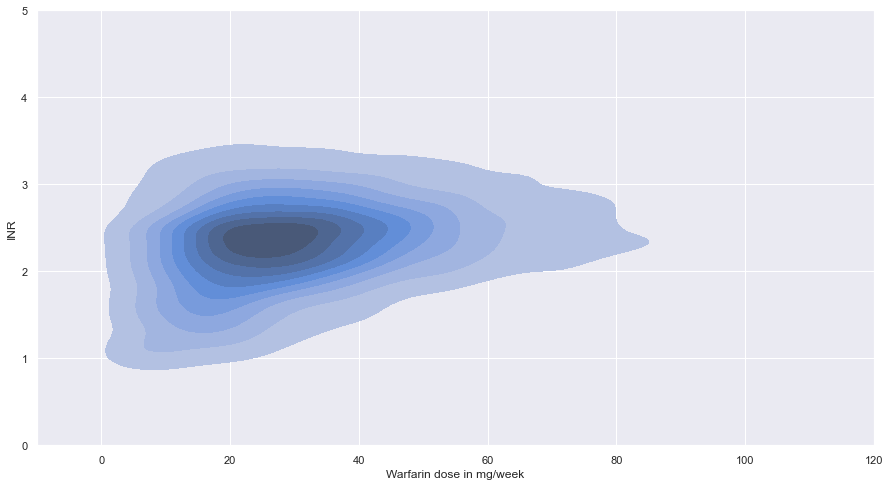

In [155]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(
    data=data, fill=True,
    x='Warfarin dose in mg/week',
    y='INR')
ax.set_xlim([-10, 120])
ax.set_ylim([0, 5])
plt.show()

## Conditional distributions over CYP2C9 variants

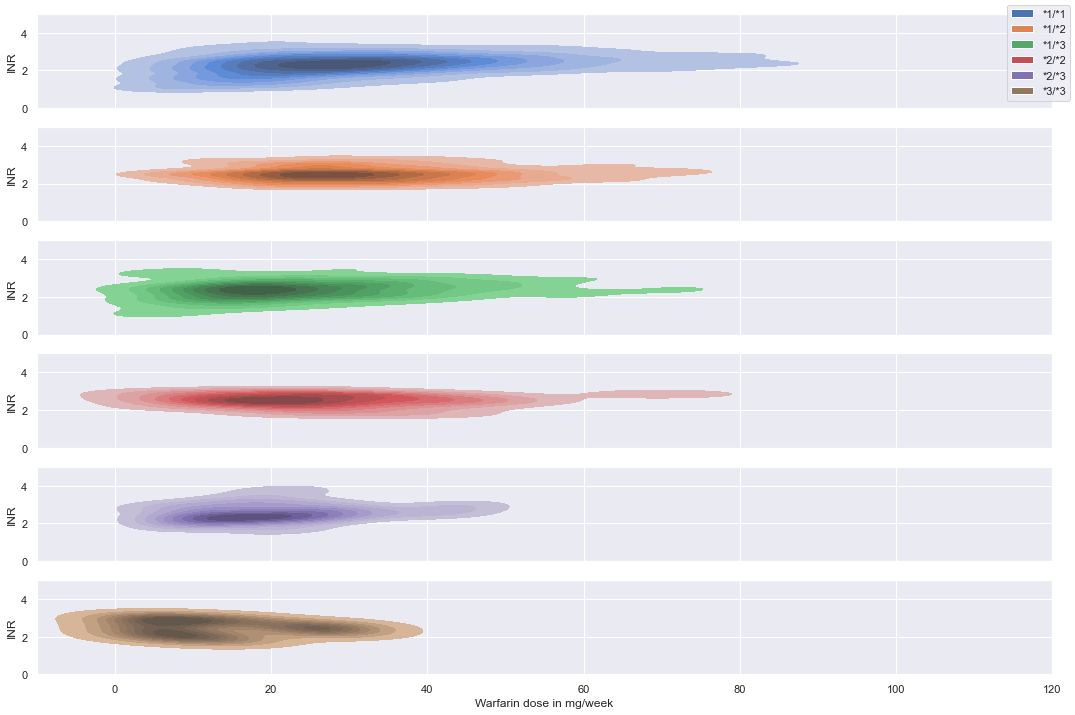

In [156]:
fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(15,10))
colours = sns.color_palette()
variants = ['*1/*1', '*1/*2', '*1/*3', '*2/*2', '*2/*3', '*3/*3']
legend_handles = []
for idv, variant in enumerate(variants):
    mask = data['CYP2C9'] == variant
    sns.kdeplot(
        data=data[mask], fill=True, ax=axes[idv], color=colours[idv],
        x='Warfarin dose in mg/week',
        y='INR')
    axes[idv].set_xlim([-10, 120])
    axes[idv].set_ylim([0, 5])
    legend_handles.append(
        mpatches.Patch(facecolor=colours[idv], label=variant))

fig.legend(handles=legend_handles)
plt.tight_layout()

## Conditional distributions over VKORC1 variants

We will only look at the -1639 locus mutation.

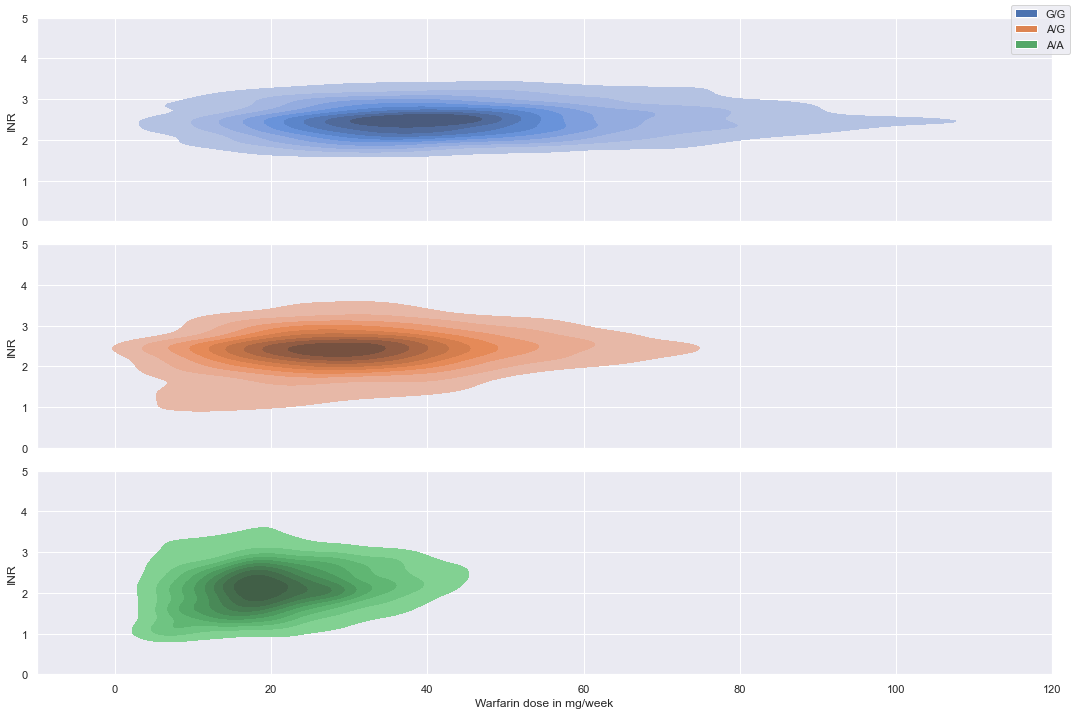

In [157]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15,10))
colours = sns.color_palette()
variants = ['G/G', 'A/G', 'A/A']
legend_handles = []
for idv, variant in enumerate(variants):
    mask = data['VKORC1 -1639'] == variant
    sns.kdeplot(
        data=data[mask], fill=True, ax=axes[idv], color=colours[idv],
        x='Warfarin dose in mg/week',
        y='INR')
    axes[idv].set_xlim([-10, 120])
    axes[idv].set_ylim([0, 5])
    legend_handles.append(
        mpatches.Patch(facecolor=colours[idv], label=variant))

fig.legend(handles=legend_handles)
plt.tight_layout()

## Conditional distributions on genotype combinations

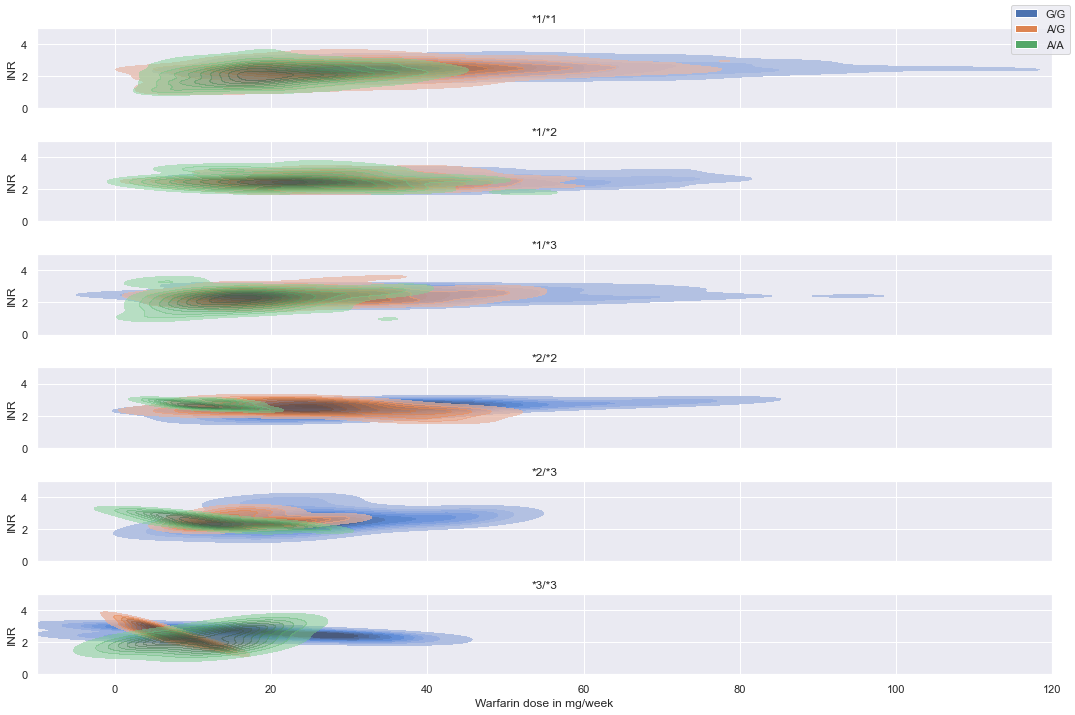

In [158]:
fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(15,10))
colours = sns.color_palette()
cyp_variants = ['*1/*1', '*1/*2', '*1/*3', '*2/*2', '*2/*3', '*3/*3']
vkorc1_variants = ['G/G', 'A/G', 'A/A']
alpha = [1, 0.7, 0.5]
for idv, cyp_variant in enumerate(cyp_variants):
    mask = data['CYP2C9'] == cyp_variant
    temp = data[mask]
    legend_handles = []
    for _id, vkorc1_variant in enumerate(vkorc1_variants):
        mask = temp['VKORC1 -1639'] == vkorc1_variant
        sns.kdeplot(
            data=temp[mask], fill=True, ax=axes[idv], color=colours[_id],
            x='Warfarin dose in mg/week',
            y='INR', alpha=alpha[_id])
        legend_handles.append(
        mpatches.Patch(facecolor=colours[_id], label=vkorc1_variant))
    axes[idv].set_xlim([-10, 120])
    axes[idv].set_ylim([0, 5])
    axes[idv].set_title(cyp_variant)

fig.legend(handles=legend_handles)
plt.tight_layout()

## Marginal distribution over age

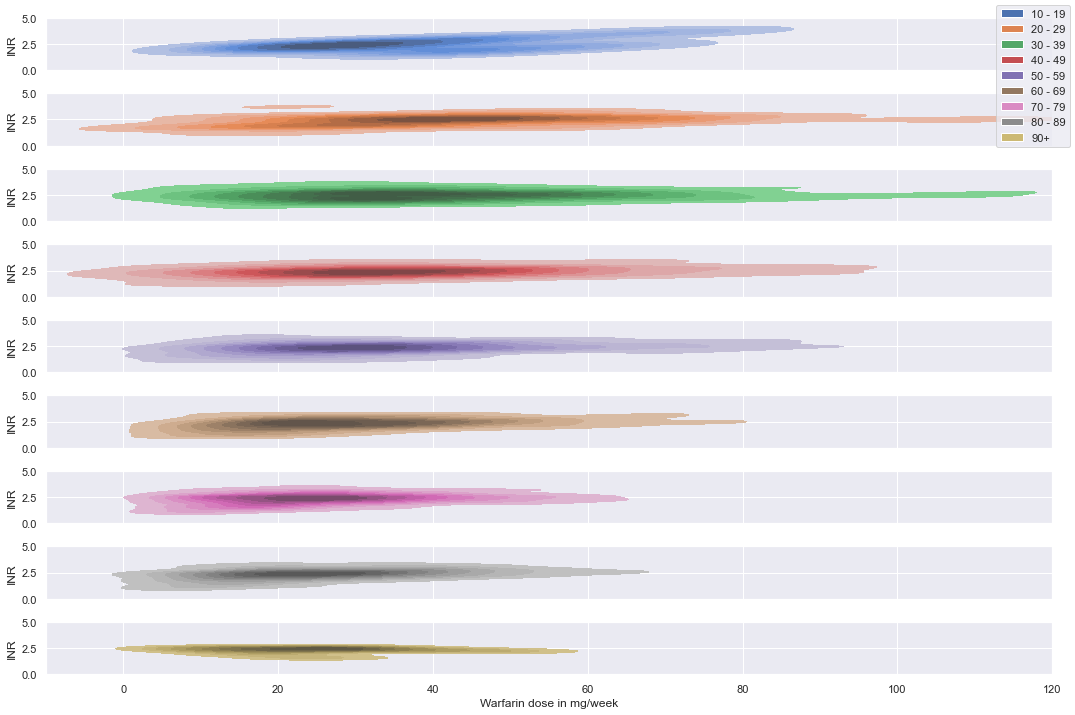

In [159]:
fig, axes = plt.subplots(nrows=9, ncols=1, sharex=True, figsize=(15,10))
colours = sns.color_palette()
age_groups = np.sort(data['Age'].dropna().unique())
legend_handles = []
for idv, age_group in enumerate(age_groups):
    mask = data['Age'] == age_group
    sns.kdeplot(
        data=data[mask], fill=True, ax=axes[idv], color=colours[idv],
        x='Warfarin dose in mg/week',
        y='INR')
    axes[idv].set_xlim([-10, 120])
    axes[idv].set_ylim([0, 5])
    legend_handles.append(
        mpatches.Patch(facecolor=colours[idv], label=age_group))

fig.legend(handles=legend_handles)
plt.tight_layout()

## Joint distribution with weight

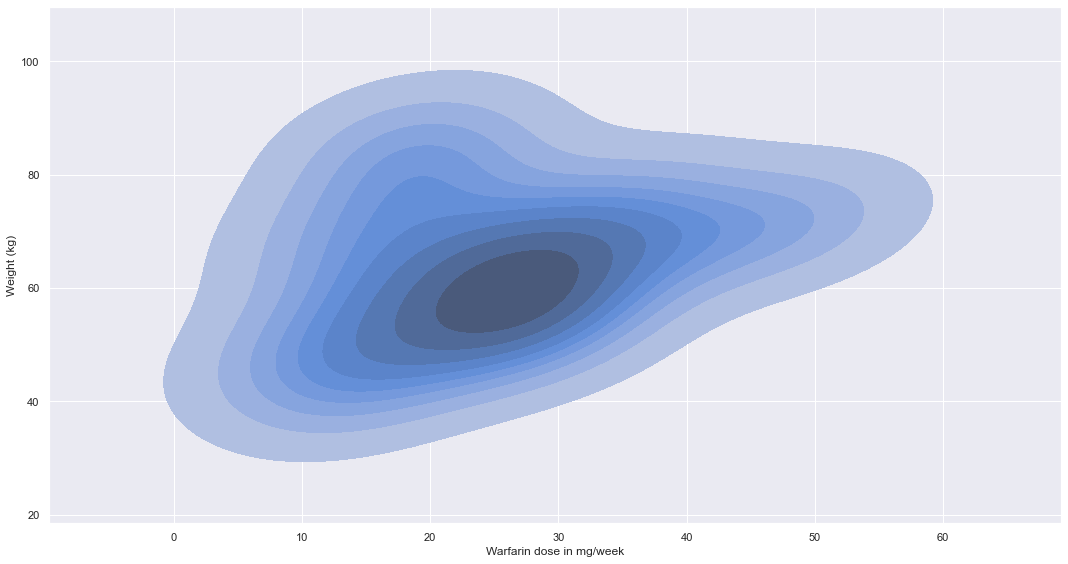

In [160]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(
    data=data[mask], fill=True,
    x='Warfarin dose in mg/week',
    y='Weight (kg)')
axes[idv].set_xlim([-10, 120])
plt.tight_layout()

## Joint distribution with height

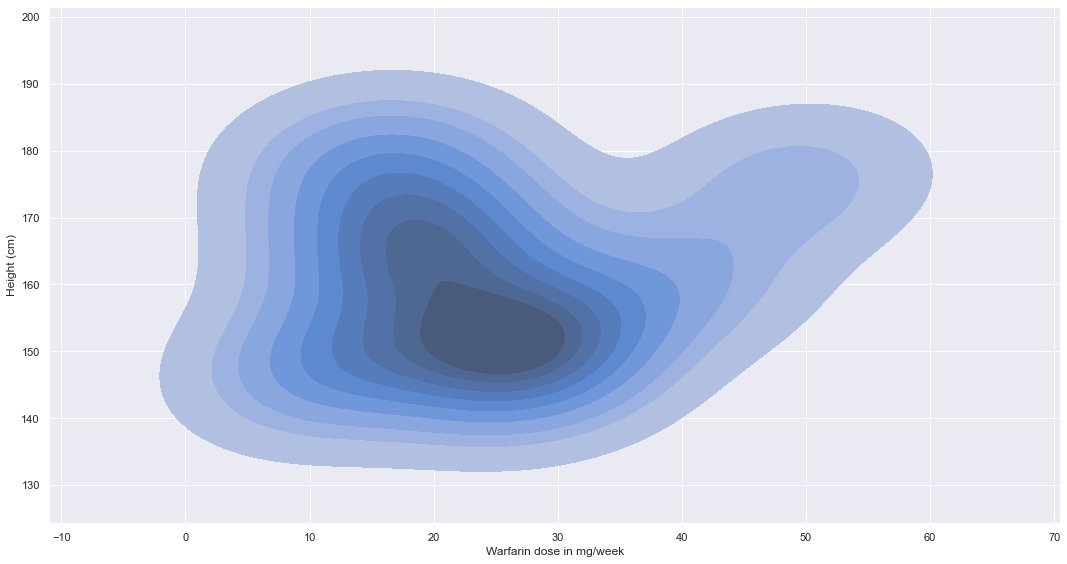

In [161]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(
    data=data[mask], fill=True,
    x='Warfarin dose in mg/week',
    y='Height (cm)')
axes[idv].set_xlim([-10, 120])
plt.tight_layout()

## Test independence of polymorphisms

Population size:  3453


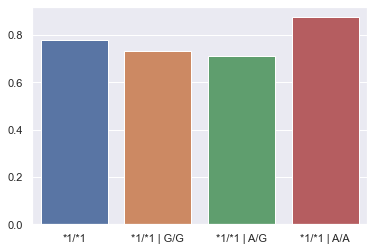

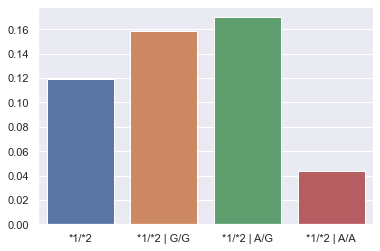

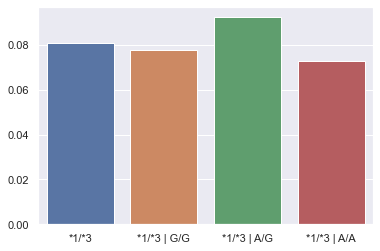

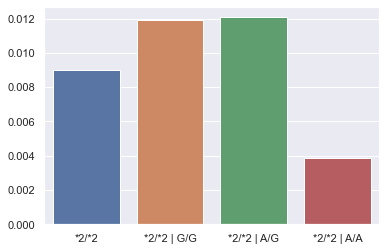

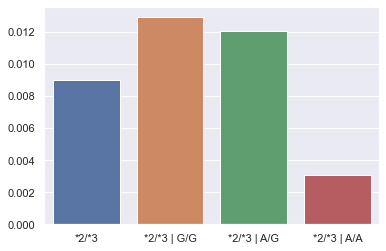

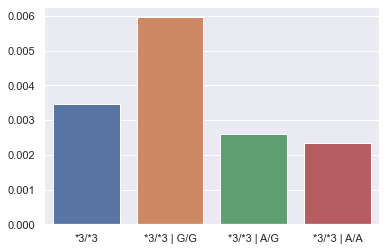

In [162]:
# *1/*1
total = len(data)
mask = data['CYP2C9'] == '*1/*1'
temp = data[mask]
a11 = len(temp)
mask = temp['VKORC1 -1639'] == 'G/G'
aGG = len(data[data['VKORC1 -1639'] == 'G/G'])
a11_aGG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/G'
aAG = len(data[data['VKORC1 -1639'] == 'A/G'])
a11_aAG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/A'
aAA = len(data[data['VKORC1 -1639'] == 'A/A'])
a11_aAA = len(temp[mask])

print('Population size: ', total)

sns.barplot(
    x=['*1/*1', '*1/*1 | G/G', '*1/*1 | A/G', '*1/*1 | A/A'],
    y=[a11/total, a11_aGG/aGG, a11_aAG/aAG, a11_aAA/aAA])
plt.show()

# *1/*2
total = len(data)
mask = data['CYP2C9'] == '*1/*2'
temp = data[mask]
a12 = len(temp)
mask = temp['VKORC1 -1639'] == 'G/G'
aGG = len(data[data['VKORC1 -1639'] == 'G/G'])
a12_aGG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/G'
aAG = len(data[data['VKORC1 -1639'] == 'A/G'])
a12_aAG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/A'
aAA = len(data[data['VKORC1 -1639'] == 'A/A'])
a12_aAA = len(temp[mask])

sns.barplot(
    x=['*1/*2', '*1/*2 | G/G', '*1/*2 | A/G', '*1/*2 | A/A'],
    y=[a12/total, a12_aGG/aGG, a12_aAG/aAG, a12_aAA/aAA])
plt.show()

# *2/*2
total = len(data)
mask = data['CYP2C9'] == '*1/*3'
temp = data[mask]
a13 = len(temp)
mask = temp['VKORC1 -1639'] == 'G/G'
aGG = len(data[data['VKORC1 -1639'] == 'G/G'])
a13_aGG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/G'
aAG = len(data[data['VKORC1 -1639'] == 'A/G'])
a13_aAG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/A'
aAA = len(data[data['VKORC1 -1639'] == 'A/A'])
a13_aAA = len(temp[mask])

sns.barplot(
    x=['*1/*3', '*1/*3 | G/G', '*1/*3 | A/G', '*1/*3 | A/A'],
    y=[a13/total, a13_aGG/aGG, a13_aAG/aAG, a13_aAA/aAA])
plt.show()

# *2/*2
total = len(data)
mask = data['CYP2C9'] == '*2/*2'
temp = data[mask]
a22 = len(temp)
mask = temp['VKORC1 -1639'] == 'G/G'
aGG = len(data[data['VKORC1 -1639'] == 'G/G'])
a22_aGG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/G'
aAG = len(data[data['VKORC1 -1639'] == 'A/G'])
a22_aAG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/A'
aAA = len(data[data['VKORC1 -1639'] == 'A/A'])
a22_aAA = len(temp[mask])

sns.barplot(
    x=['*2/*2', '*2/*2 | G/G', '*2/*2 | A/G', '*2/*2 | A/A'],
    y=[a22/total, a22_aGG/aGG, a22_aAG/aAG, a22_aAA/aAA])
plt.show()

# *2/*3
total = len(data)
mask = data['CYP2C9'] == '*2/*3'
temp = data[mask]
a23 = len(temp)
mask = temp['VKORC1 -1639'] == 'G/G'
aGG = len(data[data['VKORC1 -1639'] == 'G/G'])
a23_aGG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/G'
aAG = len(data[data['VKORC1 -1639'] == 'A/G'])
a23_aAG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/A'
aAA = len(data[data['VKORC1 -1639'] == 'A/A'])
a23_aAA = len(temp[mask])

sns.barplot(
    x=['*2/*3', '*2/*3 | G/G', '*2/*3 | A/G', '*2/*3 | A/A'],
    y=[a23/total, a23_aGG/aGG, a23_aAG/aAG, a23_aAA/aAA])
plt.show()

# *3/*3
total = len(data)
mask = data['CYP2C9'] == '*3/*3'
temp = data[mask]
a33 = len(temp)
mask = temp['VKORC1 -1639'] == 'G/G'
aGG = len(data[data['VKORC1 -1639'] == 'G/G'])
a33_aGG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/G'
aAG = len(data[data['VKORC1 -1639'] == 'A/G'])
a33_aAG = len(temp[mask])
mask = temp['VKORC1 -1639'] == 'A/A'
aAA = len(data[data['VKORC1 -1639'] == 'A/A'])
a33_aAA = len(temp[mask])

sns.barplot(
    x=['*3/*3', '*3/*3 | G/G', '*3/*3 | A/G', '*3/*3 | A/A'],
    y=[a33/total, a33_aGG/aGG, a33_aAG/aAG, a33_aAA/aAA])
plt.show()